Semana 9 - Reto Calidad del agua

Lázaro Lara Martínez. Matricula A01793198
José Mtanous Treviño. Matricula A00169781

Ciencia y Analítica de datos.

Profesor Titular. Jobish Vallikavungal Devassia
Profesor Tutor. Mtro. Mario Alberto Solano Saldaña

09/Noviembre\/2022

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

import geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
from sklearn.cluster import KMeans

In [146]:
# cargamos nuestro dataset y lo inspeccionamos rapídamente
path_escalas_subterranea = '../Reto/datos/Escalas_subterranea.csv'
path_calidad_subterranea = '../Reto/datos/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

dfEscalasSubterranea = pd.read_csv(path_escalas_subterranea)
dfCalidadSubterranea = pd.read_csv(path_calidad_subterranea)

In [147]:
dfEscalasSubterranea.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


In [148]:
dfEscalasSubterranea.describe()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
count,66,66,66
unique,47,52,29
top,Potable - Excelente,CRITERIO,DESCRIPCION
freq,8,14,14


In [149]:
dfCalidadSubterranea.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [150]:
dfCalidadSubterranea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [151]:
dfCalidadSubterranea.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

#### Hacemos limpieza de algunas columnas que no tienen información:
- **SDT_mg/L** Siempre está vacía
- **PERIODO** solo tiene un valor *2020*
- **CLAVE** es un indentificador único por registro


In [152]:
# Borramoe SDT_mg/L porque siempre está vacía
dfCalidadSubterranea.drop(['SDT_mg/L', 'PERIODO', 'CLAVE'],axis=1,inplace=True)

In [153]:
dfCalidadSubterranea.isna().sum()

SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
ALC_mg/L                  4
CALIDAD_ALC               4
CONDUCT_mS/cm             6
CALIDAD_CONDUC            6
SDT_M_mg/L                2
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  1
CALIDAD_DUR               1
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                1
CALIDAD_N_NO3             1
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L               0
CALIDAD_MN                0
FE_TOT_mg/L         

In [154]:
###De las columnas que contienen nulos borrar registros con mas de 2 nulos,
# ¿Para qué?

col_lst = ['CONTAMINANTES', 'CALIDAD_N_NO3','N_NO3_mg/L','CALIDAD_DUR', 'DUR_mg/L', 'SDT_M_mg/L','CALIDAD_SDT_ra','CALIDAD_SDT_salin', 'ALC_mg/L','CALIDAD_ALC','CONDUCT_mS/cm','CALIDAD_CONDUC']

dfCalidadSubterranea.dropna(axis = 0, subset = col_lst, thresh=2, inplace = True)

In [155]:
dfCalidadSubterranea.isna().sum()

SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
ALC_mg/L                  4
CALIDAD_ALC               4
CONDUCT_mS/cm             6
CALIDAD_CONDUC            6
SDT_M_mg/L                2
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  1
CALIDAD_DUR               1
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                1
CALIDAD_N_NO3             1
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L               0
CALIDAD_MN                0
FE_TOT_mg/L         

### Ningún registro tiene más de 2 campos nulos.

In [156]:
### Categoricas y numéricas con nulos para imputar.

categoricas = ['CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_N_NO3','CALIDAD_DUR','CALIDAD_ALC','CALIDAD_CONDUC']

numericas = [ 'N_NO3_mg/L', 'DUR_mg/L', 'SDT_M_mg/L', 'ALC_mg/L','CONDUCT_mS/cm',]


In [157]:
dfCalidadSubterranea['DUR_mg/L']

0        213.732
1       185.0514
2        120.719
3        199.879
4       476.9872
          ...   
1063     752.096
1064         273
1065    660.2126
1066     406.368
1067     362.544
Name: DUR_mg/L, Length: 1068, dtype: object

In [158]:
###convertimos datos no numericos.

dfCalidadSubterranea.loc[ dfCalidadSubterranea['FLUORUROS_mg/L'] == '<0.2', 'FLUORUROS_mg/L'] = 0.2

dfCalidadSubterranea.loc[ dfCalidadSubterranea['COLI_FEC_NMP/100_mL'] == '<1.1', 'COLI_FEC_NMP/100_mL'] = 1.1

dfCalidadSubterranea.loc[ dfCalidadSubterranea['AS_TOT_mg/L'] == '<0.01', 'AS_TOT_mg/L'] = 0.01

dfCalidadSubterranea.loc[ dfCalidadSubterranea['CD_TOT_mg/L'] == '<0.003', 'CD_TOT_mg/L'] = 0.003

dfCalidadSubterranea.loc[ dfCalidadSubterranea['CR_TOT_mg/L'] == '<0.005', 'CR_TOT_mg/L'] = 0.005

dfCalidadSubterranea.loc[ dfCalidadSubterranea['HG_TOT_mg/L'] == '<0.0005', 'HG_TOT_mg/L'] = 0.0005

dfCalidadSubterranea.loc[ dfCalidadSubterranea['PB_TOT_mg/L'] == '<0.005', 'PB_TOT_mg/L'] = 0.005

dfCalidadSubterranea.loc[ dfCalidadSubterranea['MN_TOT_mg/L'] == '<0.0015', 'MN_TOT_mg/L'] = 0.0015




dfCalidadSubterranea.loc[ dfCalidadSubterranea['N_NO3_mg/L'] == '<0.02', 'N_NO3_mg/L'] = 0.02

dfCalidadSubterranea.loc[ dfCalidadSubterranea['DUR_mg/L'] == '<20', 'DUR_mg/L'] = 20

dfCalidadSubterranea.loc[ dfCalidadSubterranea['SDT_M_mg/L'] == '<25', 'SDT_M_mg/L'] = 25

dfCalidadSubterranea['N_NO3_mg/L'] = dfCalidadSubterranea['N_NO3_mg/L'].astype(float)

dfCalidadSubterranea['DUR_mg/L'] = dfCalidadSubterranea['DUR_mg/L'].astype(float)

dfCalidadSubterranea['SDT_M_mg/L'] = dfCalidadSubterranea['SDT_M_mg/L'].astype(float)


dfCalidadSubterranea['FLUORUROS_mg/L'] = dfCalidadSubterranea['FLUORUROS_mg/L'].astype(float)
dfCalidadSubterranea['COLI_FEC_NMP/100_mL'] = dfCalidadSubterranea['COLI_FEC_NMP/100_mL'].astype(float)
dfCalidadSubterranea['AS_TOT_mg/L'] = dfCalidadSubterranea['AS_TOT_mg/L'].astype(float)
dfCalidadSubterranea['CD_TOT_mg/L'] = dfCalidadSubterranea['CD_TOT_mg/L'].astype(float)
dfCalidadSubterranea['CR_TOT_mg/L'] = dfCalidadSubterranea['CR_TOT_mg/L'].astype(float)
dfCalidadSubterranea['HG_TOT_mg/L'] = dfCalidadSubterranea['HG_TOT_mg/L'].astype(float)

dfCalidadSubterranea['PB_TOT_mg/L'] = dfCalidadSubterranea['PB_TOT_mg/L'].astype(float)
dfCalidadSubterranea['MN_TOT_mg/L'] = dfCalidadSubterranea['MN_TOT_mg/L'].astype(float)


In [159]:
dfCalidadSubterranea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1067
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SITIO                 1068 non-null   object 
 1   ORGANISMO_DE_CUENCA   1068 non-null   object 
 2   ESTADO                1068 non-null   object 
 3   MUNICIPIO             1068 non-null   object 
 4   ACUIFERO              1068 non-null   object 
 5   SUBTIPO               1068 non-null   object 
 6   LONGITUD              1068 non-null   float64
 7   LATITUD               1068 non-null   float64
 8   ALC_mg/L              1064 non-null   float64
 9   CALIDAD_ALC           1064 non-null   object 
 10  CONDUCT_mS/cm         1062 non-null   float64
 11  CALIDAD_CONDUC        1062 non-null   object 
 12  SDT_M_mg/L            1066 non-null   float64
 13  CALIDAD_SDT_ra        1066 non-null   object 
 14  CALIDAD_SDT_salin     1066 non-null   object 
 15  FLUORUROS_mg/L       

In [160]:
for key in numericas:
    mean_value=dfCalidadSubterranea[key].mean()
    dfCalidadSubterranea[key].fillna(value=mean_value, inplace=True)

for key2 in categoricas:
    mode=dfCalidadSubterranea[key2].mode()
    #print(mode)
    dfCalidadSubterranea[key2].fillna(value=mode.to_string(), inplace=True)



### Columna CONTAMINANTES
Esta columna contiene una lista separada por comas de los contaminantes encontrados en las muestras, sin embargo las muestras que no tienen contaminantes tienen este registro nulo. En general un campo nulo se entiendo como una muestra no capturada o un campo donde no hay información pero en este caso no es así. Una muestra sin contaminantes indica que el agua está limpia. Además varias librerías ignoran los valores nulos al momento de procesar los datos. Para quitar esta ambigüedad, vamos a sustituir los valores nulos por el string 'NINGUNO'

In [ ]:
dfCalidadSubterranea['CONTAMINANTES'].fillna('NINGUNO', inplace=True)


In [161]:
dfCalidadSubterranea.isna().sum()

SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTE

In [162]:
dfCalidadSubterranea['CALIDAD_CONDUC']

0       Permisible para riego
1            Buena para riego
2            Buena para riego
3            Buena para riego
4       Permisible para riego
                ...          
1063        Dudosa para riego
1064         Buena para riego
1065        Dudosa para riego
1066    Permisible para riego
1067    Permisible para riego
Name: CALIDAD_CONDUC, Length: 1068, dtype: object

In [163]:
#### de una vez normalizamos?
## No nos conviene normalizar todavia porque si hay algun rango o umbral se va a perder el valor
#
#numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', MinMaxScaler())])
#categorical_transformer = Pipeline(
#    steps=[('imputer', SimpleImputer(strategy='most_frequent'))])
#
#transformer = ColumnTransformer(
#    transformers=[
#        ('Numericas', numeric_transformer, numericas),
#        ('Categoricas', categorical_transformer, categoricas)
#    ],
#    remainder='passthrough'
#)


In [164]:
###Revisamos de nuevo cuantos nulos hay

dfCalidadSubterranea.isna().sum()

SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTE

### Grabamos los datos limpios

In [165]:
outPath = '../Reto/datos/Escalas_subterranea_clean.csv'
dfCalidadSubterranea.to_csv(outPath)


In [139]:
pip install geopandas

  Using cached geopandas-0.12.1-py3-none-any.whl (1.1 MB)
  Using cached Shapely-1.8.5.post1-cp310-cp310-macosx_10_9_x86_64.whl (1.2 MB)
  Using cached Fiona-1.8.22-cp310-cp310-macosx_10_10_x86_64.whl (26.5 MB)
  Using cached pyproj-3.4.0-cp310-cp310-macosx_10_9_x86_64.whl (8.0 MB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install qeds

  Using cached qeds-0.7.0-py3-none-any.whl
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached statsmodels-0.13.5-cp310-cp310-macosx_10_9_x86_64.whl (9.7 MB)
  Using cached quantecon-0.5.3-py3-none-any.whl (179 kB)
  Using cached pyarrow-10.0.0-cp310-cp310-macosx_10_14_x86_64.whl (24.6 MB)
  Using cached Quandl-3.7.0-py2.py3-none-any.whl (26 kB)
  Using cached plotly-5.11.0-py2.py3-none-any.whl (15.3 MB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
  Using cached lxml-4.9.1-cp310-cp310-macosx_10_9_x86_64.whl
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)
  Using cached more_itertools-9.0.0-py3-none-any.whl (52 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
  Using cached numba-0.56.4-cp310-cp310-macosx_10_14_x86_64.whl (2.4 MB)
  Using cached sympy-1.11.1-py3-none-any.whl (6.5 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached llvmli

In [160]:
latlong=dfCalidadSubterranea[["LATITUD","LONGITUD"]]

<AxesSubplot: xlabel='LATITUD', ylabel='LONGITUD'>

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

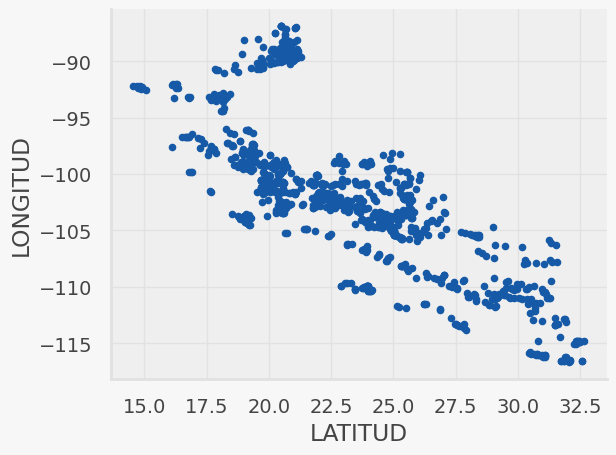

In [161]:
latlong.plot.scatter( "LATITUD","LONGITUD")

In [174]:
dfCalidadSubterranea["Coordinates"] = list(zip(dfCalidadSubterranea.LONGITUD, dfCalidadSubterranea.LATITUD))
dfCalidadSubterranea["Coordinates"] = dfCalidadSubterranea["Coordinates"].apply(Point)
dfCalidadSubterranea.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,,Coordinates
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,NaN,POINT (-102.0221 22.20887)
1,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,NaN,POINT (-102.20075 21.99958)
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,NO,SI,SI,SI,SI,SI,SI,NaN,POINT (-102.28801 22.36685)
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,NaN,POINT (-102.29449 22.18435)
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,NO,SI,SI,SI,SI,SI,SI,SI,NaN,POINT (-110.2448 23.45138)


In [175]:
gdf = gpd.GeoDataFrame(dfCalidadSubterranea, geometry="Coordinates")
gdf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,,Coordinates
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,NaN,POINT (-102.02210 22.20887)
1,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,NaN,POINT (-102.20075 21.99958)
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,NO,SI,SI,SI,SI,SI,SI,NaN,POINT (-102.28801 22.36685)
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,NaN,POINT (-102.29449 22.18435)
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,NO,SI,SI,SI,SI,SI,SI,SI,NaN,POINT (-110.24480 23.45138)


In [176]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [177]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

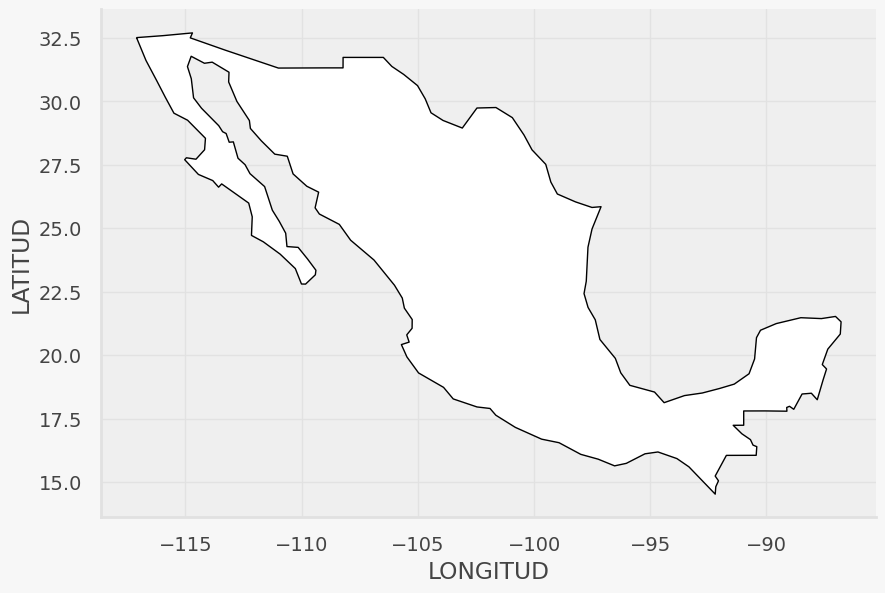

In [178]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

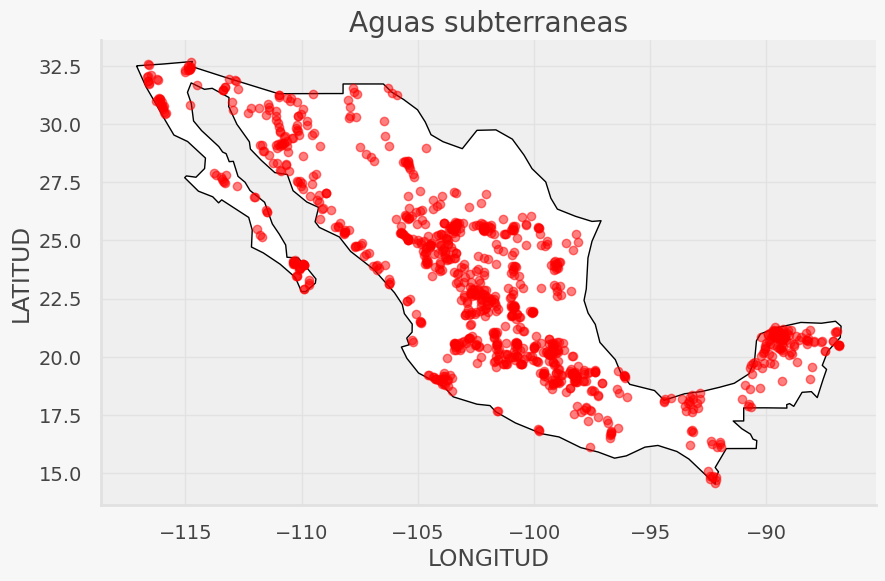

In [179]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas subterraneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [180]:
#Grafica de codo

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

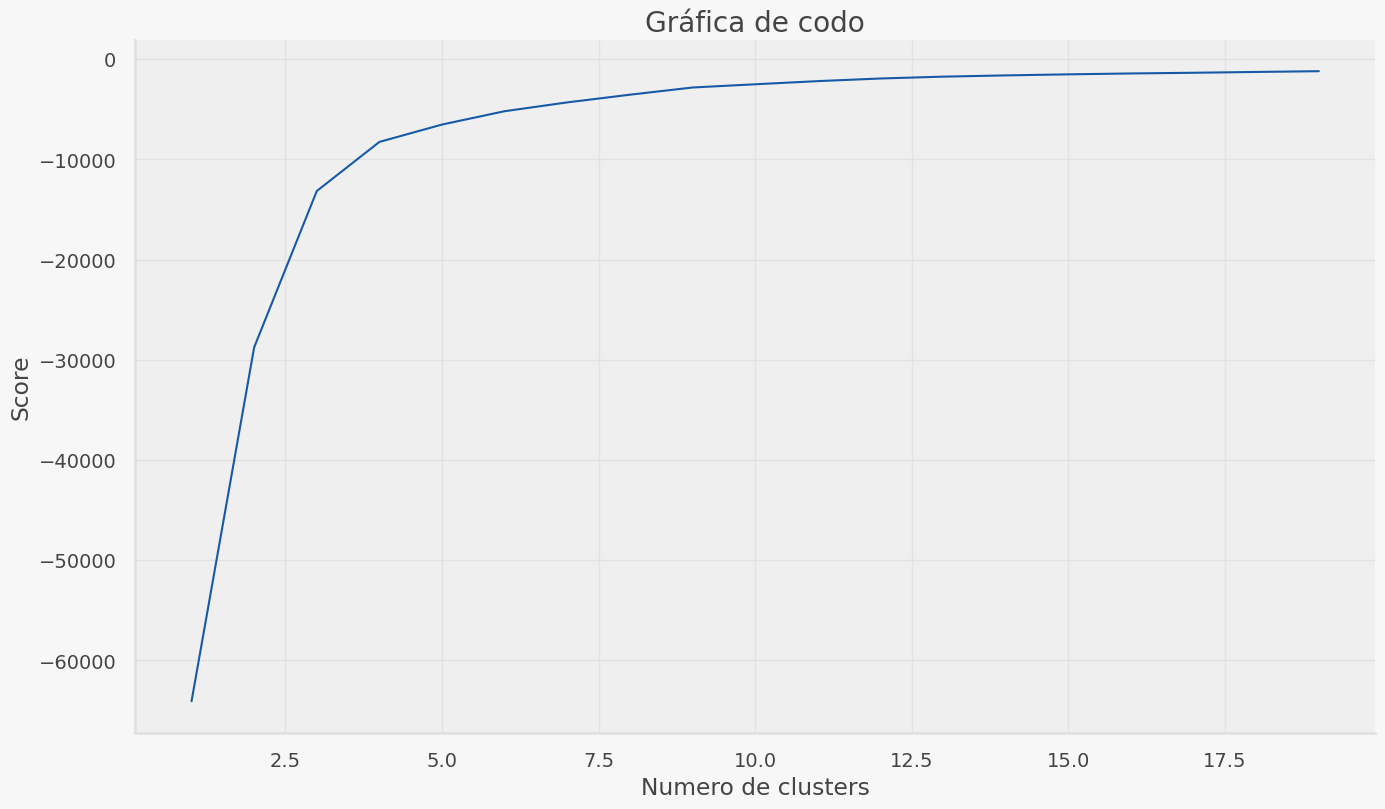

In [182]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Gráfica de codo')
plt.show()

In [211]:
#Hayamos centroides con K=4 y se prueba hasta 12.

kmeans = KMeans(n_clusters=12).fit(latlong)
centroids = kmeans.cluster_centers_
print(centroids)

[[  25.20368777 -104.07003149]
 [  20.54689724  -89.18837385]
 [  29.42764932 -106.39595561]
 [  20.34685059 -100.32879681]
 [  24.73357339 -109.2618255 ]
 [  31.61429212 -115.25191318]
 [  29.20352126 -110.99292008]
 [  17.00409656  -92.76162732]
 [  22.6327408  -102.21073776]
 [  18.6542889   -97.95352835]
 [  20.10642659 -103.65969584]
 [  24.51934889 -100.12635104]]


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

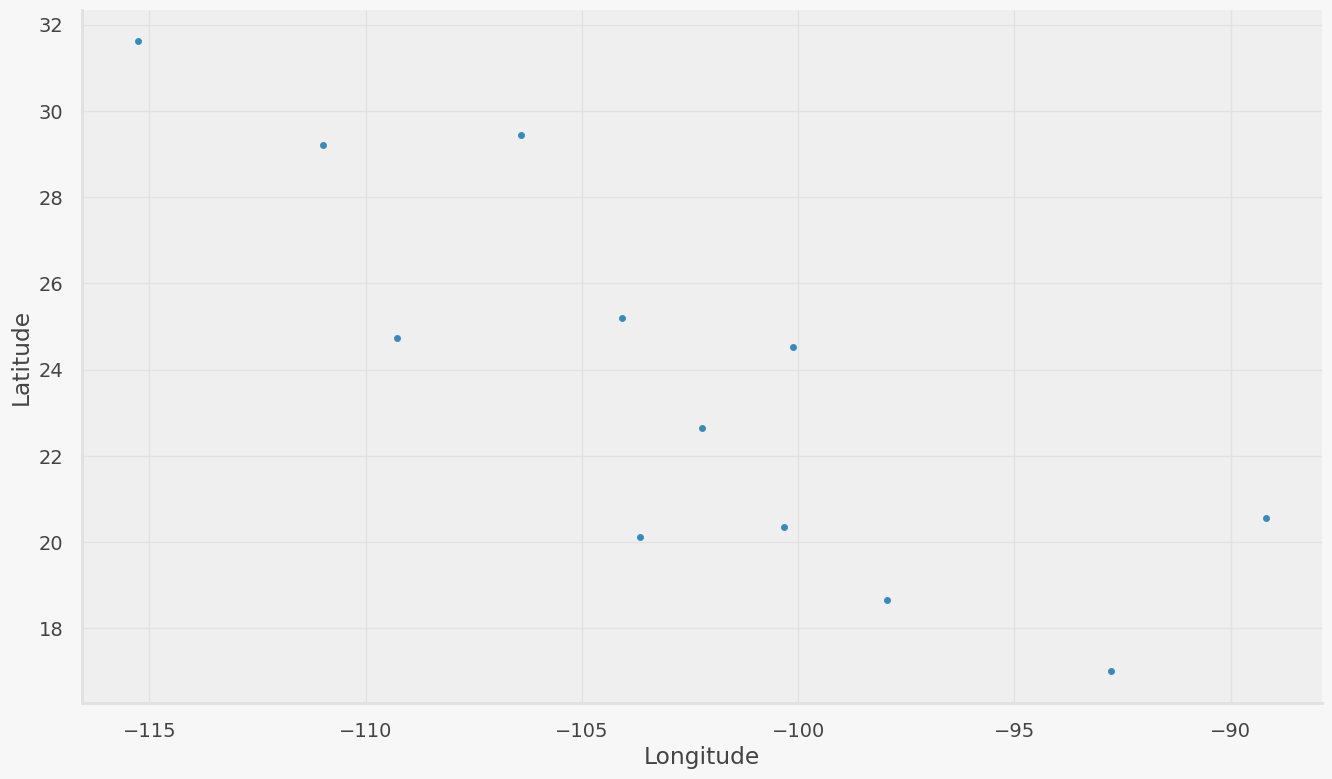

In [212]:
DistLat=centroids[:,0]
DistLong=centroids[:,1]

newCoordinates={'Latitude':DistLat,'Longitude':DistLong}

newCoordinates=pd.DataFrame(newCoordinates)
newCoordinates.plot.scatter( "Longitude","Latitude")

In [213]:
print(newCoordinates.Latitude)

0     25.203688
1     20.546897
2     29.427649
3     20.346851
4     24.733573
5     31.614292
6     29.203521
7     17.004097
8     22.632741
9     18.654289
10    20.106427
11    24.519349
Name: Latitude, dtype: float64


In [214]:
df2=pd.DataFrame()
df2["Coordinates"] = list(zip(newCoordinates.Longitude, newCoordinates.Latitude))
df2["Coordinates"] = df2["Coordinates"].apply(Point)
df2.head()

,Coordinates
0,POINT (-104.07003148850575 25.203687770114943)
1,POINT (-89.18837385123967 20.54689723966942)
2,POINT (-106.39595561290322 29.427649322580645)
3,POINT (-100.32879680985916 20.3468505915493)
4,POINT (-109.2618255 24.73357339189189)


In [215]:
gdf1 = gpd.GeoDataFrame(df2, geometry="Coordinates")

findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source Sans Pro' not found.
findfont: Font family 'Source S

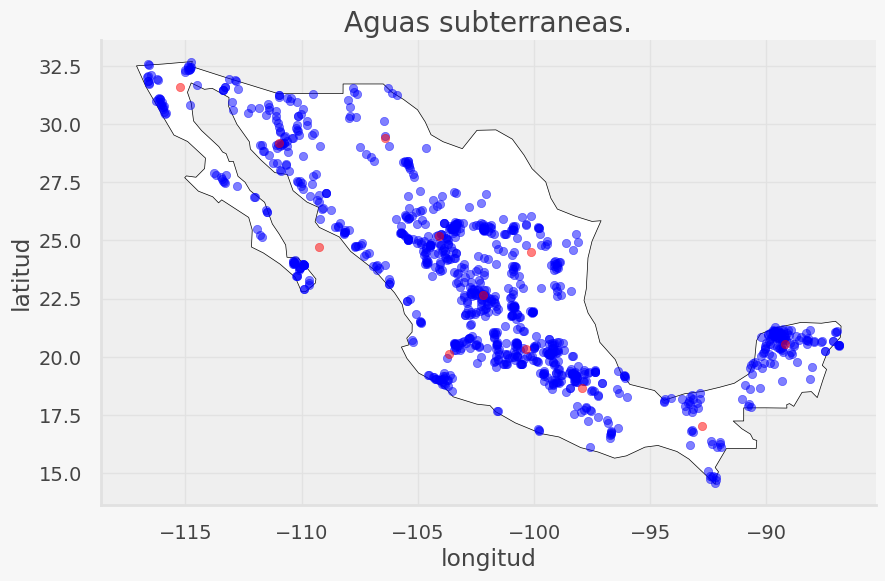

In [216]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='blue', alpha = 0.5)
gdf1.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas.')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()